# 데이터 검증

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("Dataset.csv")

In [3]:
X_tarin, X_valid = train_test_split(data, test_size=0.2, random_state=42)

In [4]:
label = data['Result']
# 손떨림 없음
mask_1= (data['Result']  == 0)

# 손떨림 있음
mask_2= (data['Result'] == 1)

# data = data.drop("Result", axis=1)

In [5]:
info = data.describe()
info

,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,Result
count,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.0,27995.0,27995.000000
mean,54.174960,5756.362779,-13338.659904,5002.228684,-239.641400,275.450938,49.089337,-1.0,-1.0,0.544597
std,5220.775301,5201.669402,3059.030305,485.190460,999.942236,3340.619622,1076.140134,0.0,0.0,0.498016
min,-9488.000000,-3148.000000,-19600.000000,3840.000000,-12023.000000,-32768.000000,-15756.000000,-1.0,-1.0,0.000000
25%,-5332.000000,776.000000,-16260.000000,4608.000000,-752.000000,75.000000,-56.000000,-1.0,-1.0,0.000000
50%,1004.000000,4144.000000,-14248.000000,4848.000000,1.000000,318.000000,11.000000,-1.0,-1.0,1.000000
75%,3724.000000,11524.000000,-11120.000000,5360.000000,77.000000,421.000000,189.000000,-1.0,-1.0,1.000000
max,17788.000000,16288.000000,-2232.000000,6080.000000,11482.000000,32767.000000,11103.000000,-1.0,-1.0,1.000000


# 데이터 전처리

In [42]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

In [43]:
st_data = st.fit(data).transform(data)

In [44]:
print(st_data.shape)
st_data : pd.DataFrame

(27995, 10)


# 모든 데이터 histogram 

In [45]:
data_col = data.columns
print(data_col)

Index(['aX', 'aY', 'aZ', 'gX', 'gY', 'gZ', 'mX', 'mY', 'mZ', 'Result'], dtype='object')


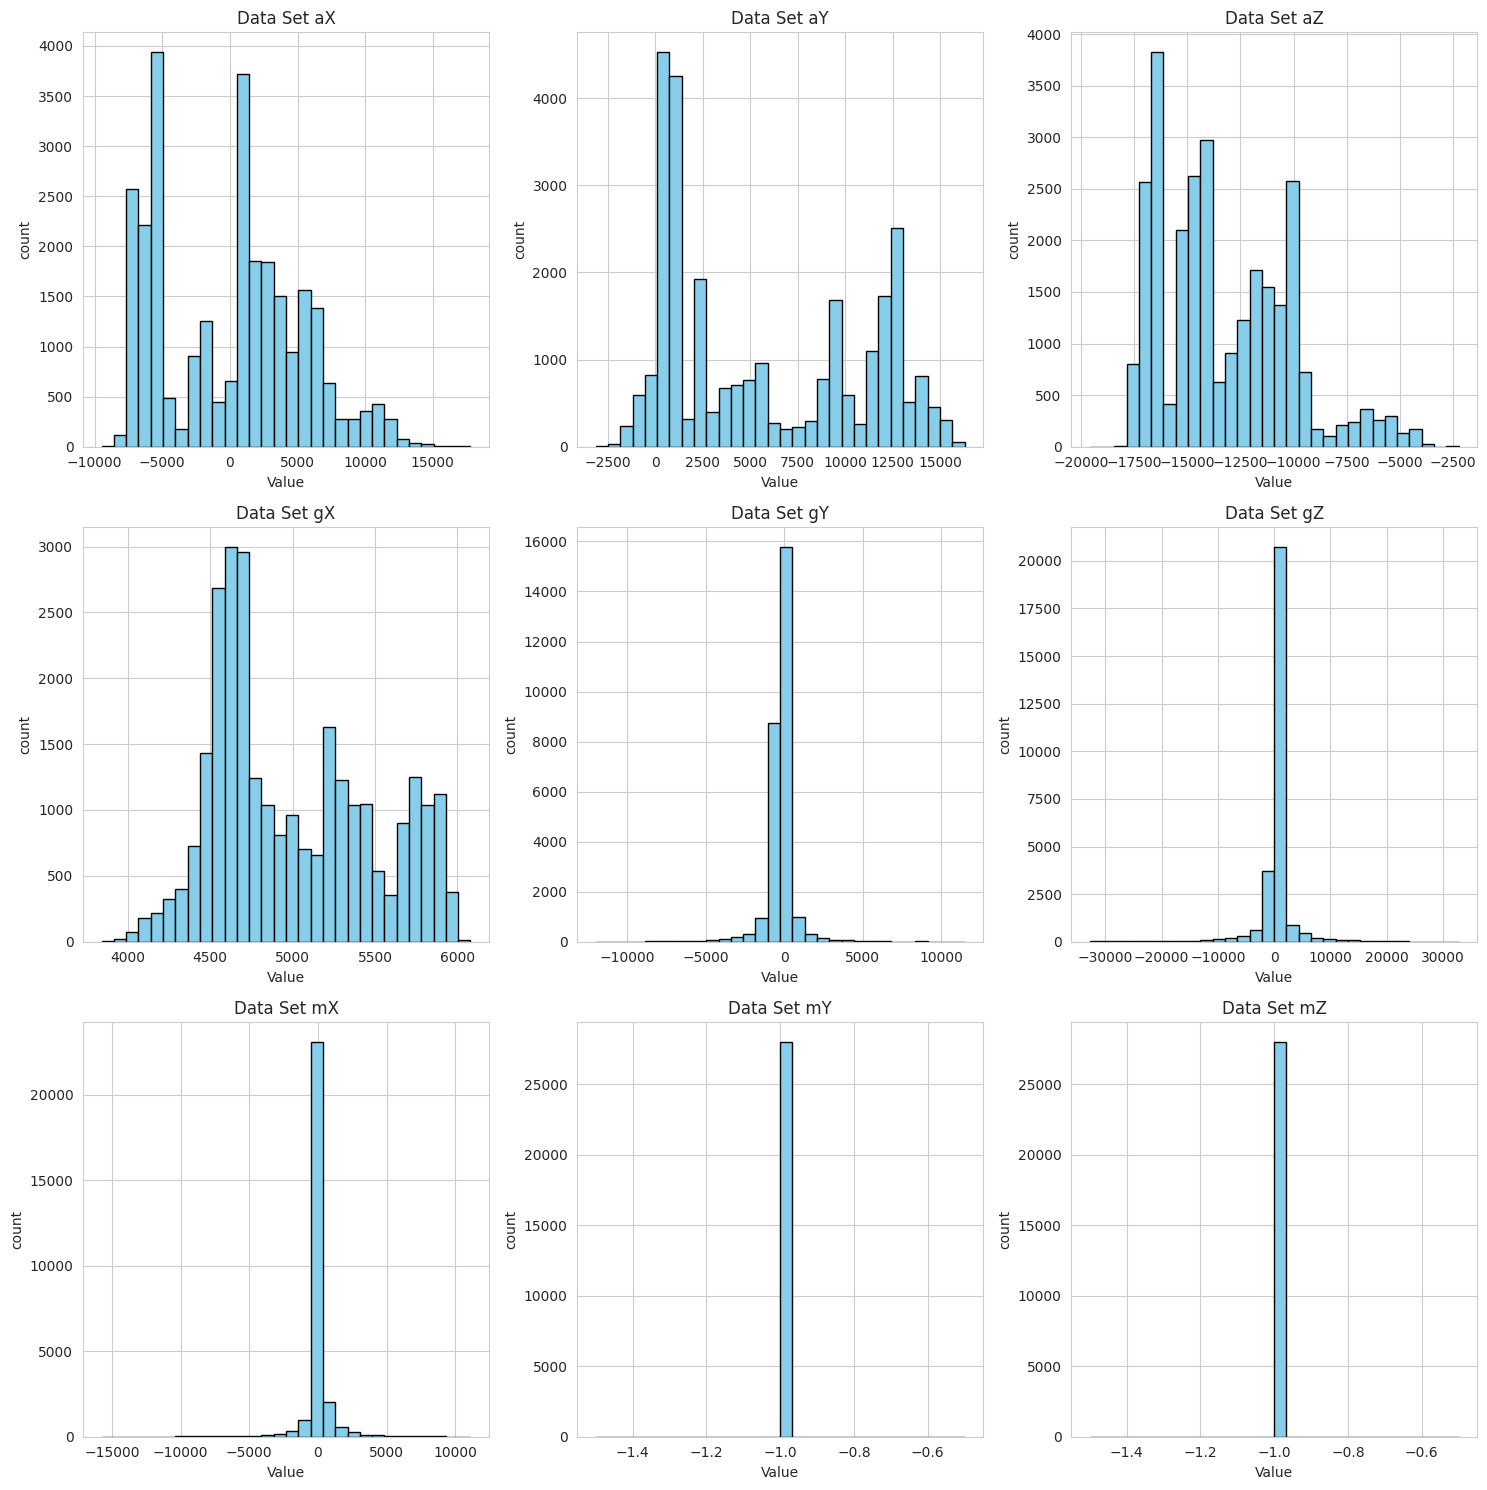

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 3 by 3 그래프를 위한 데이터 생성
# 3 by 3 서브플롯 그리기

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 각 서브플롯에 히스토그램 그리기
for i, ax in enumerate(axs.flat):
    data_set = data[data_col[i]]
    ax.hist(data_set, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Data Set {data_col[i]}')
    ax.set_xlabel('Value')
    ax.set_ylabel('count')

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 데이터가 흘들렸을때 분산

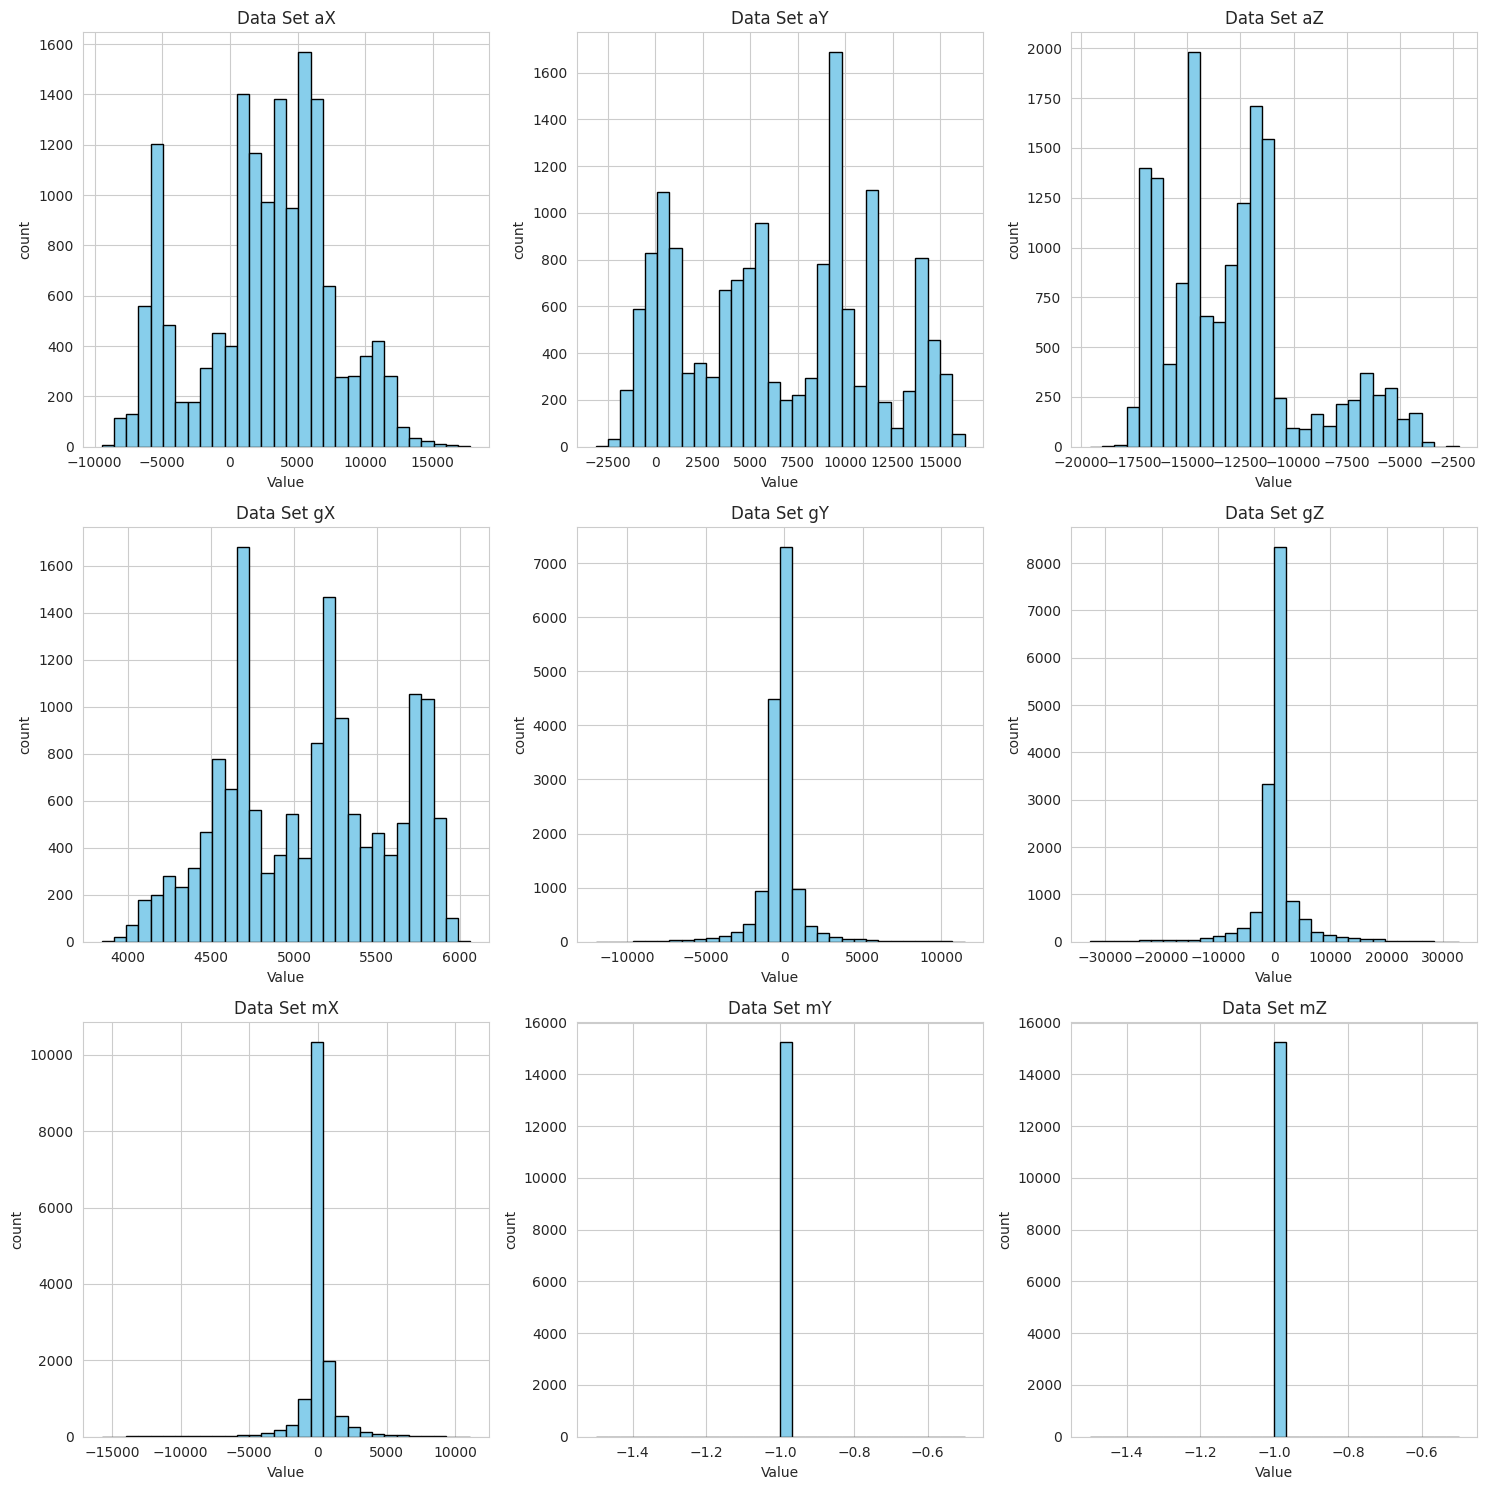

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 3 by 3 그래프를 위한 데이터 생성
# 3 by 3 서브플롯 그리기

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 각 서브플롯에 히스토그램 그리기
for i, ax in enumerate(axs.flat):
    data_set = data.loc[mask_2, data_col[i]]
    ax.hist(data_set, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Data Set {data_col[i]}')
    ax.set_xlabel('Value')
    ax.set_ylabel('count')

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 안떨리는 데이터 분산

(12749, 10)


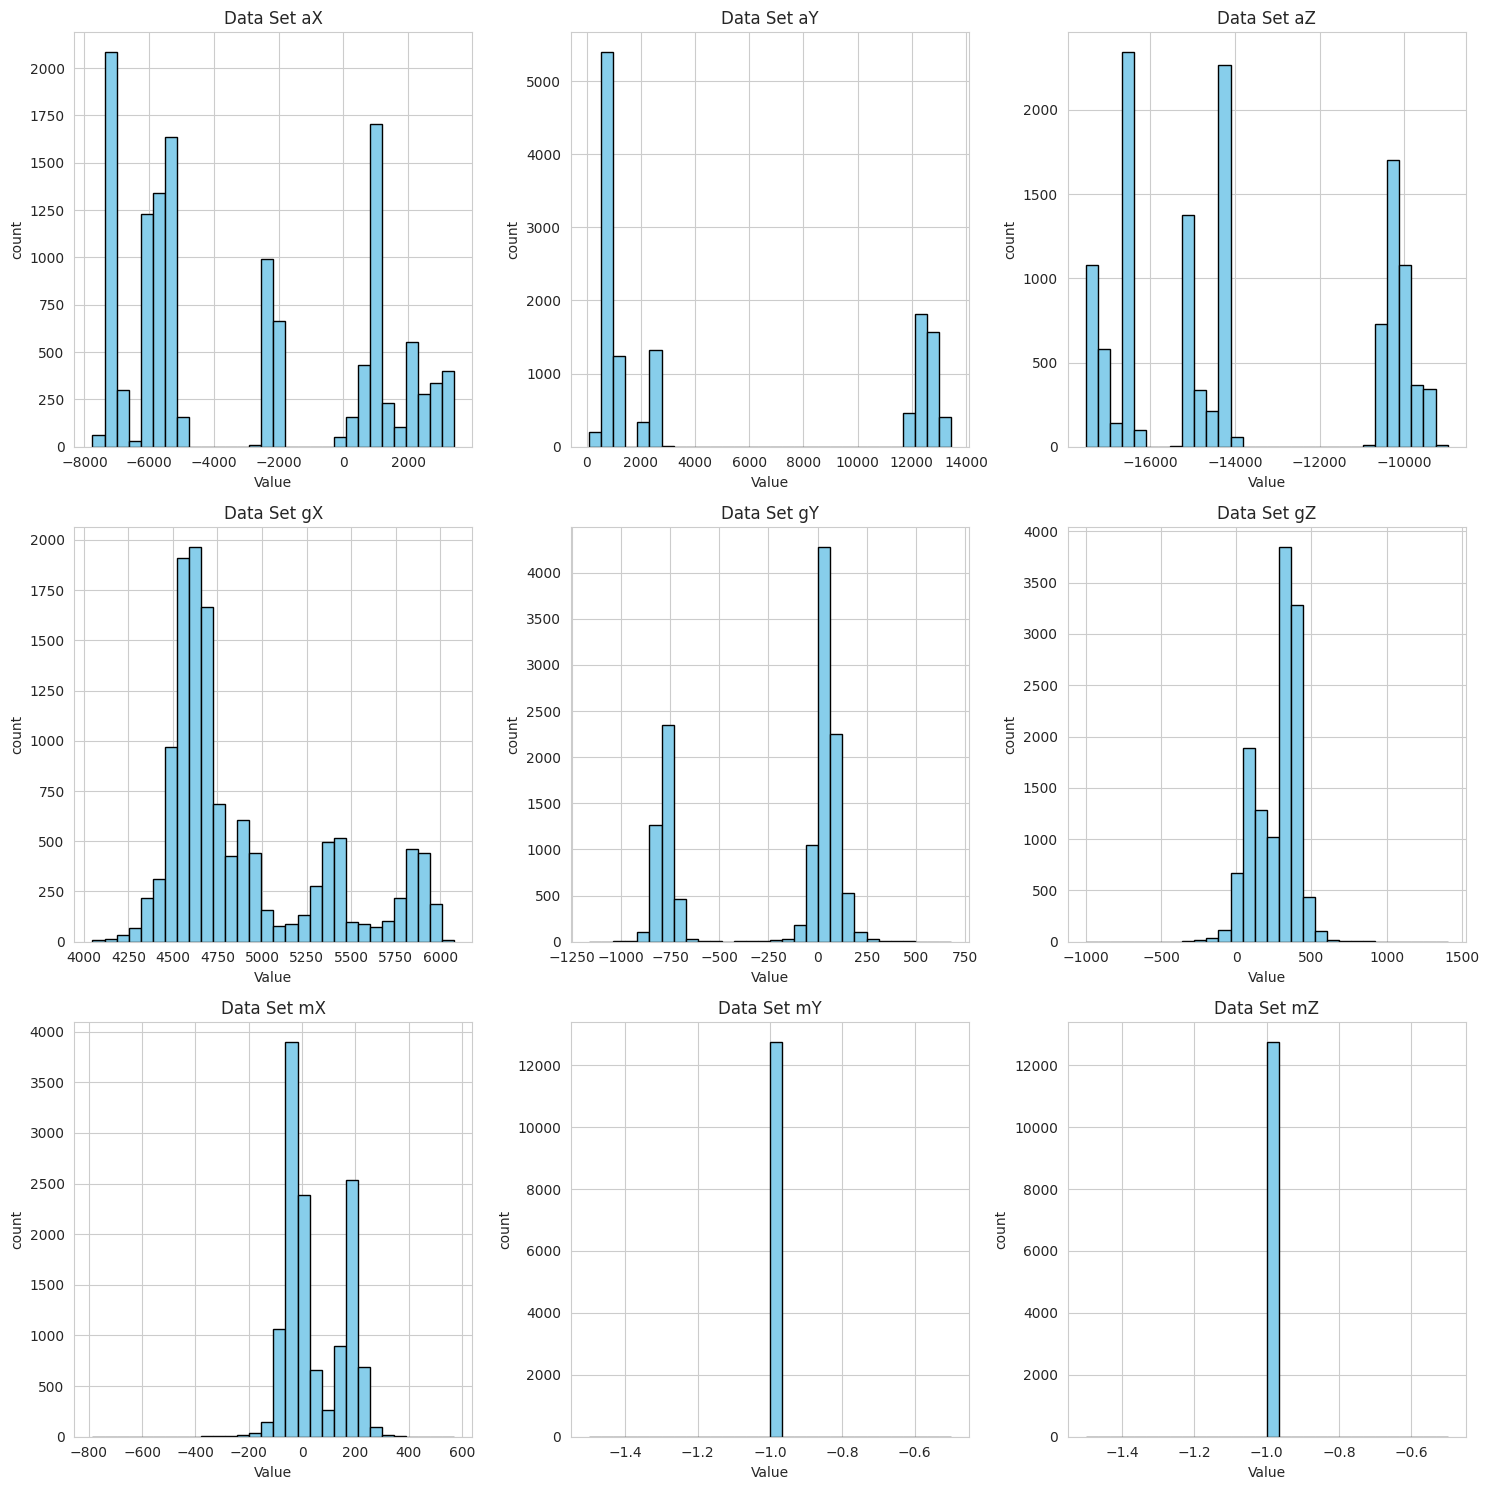

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 3 by 3 그래프를 위한 데이터 생성
# 3 by 3 서브플롯 그리기

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

print(data.loc[mask_1].shape)
# 각 서브플롯에 히스토그램 그리기
for i, ax in enumerate(axs.flat):
    data_set = data.loc[mask_1, data_col[i]]
    
    ax.hist(data_set, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Data Set {data_col[i]}')
    ax.set_xlabel('Value')
    ax.set_ylabel('count')

# 레이아웃 조정
plt.tight_layout()
plt.show()


# data drop 

In [78]:
X_tarin, X_valid = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
data = data.drop(['mY', 'mZ', "Result"], axis=1)

# data boxplot 이상치 값 판단

In [82]:
print(data)

         aX     aY     aZ    gX    gY    gZ    mX
0     -2544  14340  -6864  3840  -335 -1518 -1760
1     -2380  14188  -5644  3888  1635 -9604 -2419
2      -524  14480  -7148  3888 -1663 -1491   311
3      -528  15052  -6672  3904   461 -4012 -1424
4     -2808  14040  -5936  3904   595  -339    13
...     ...    ...    ...   ...   ...   ...   ...
27990 -5208   1152 -15040  6016    23   382   -63
27991 -5104   1048 -15160  6016    81   346   -88
27992 -5144   1108 -15100  6016     4   362   -32
27993 -5052   1892 -14688  6064   413   778   594
27994 -5072   1060 -15048  6080   -40   470   -69

[27995 rows x 7 columns]


Axes(0.125,0.11;0.775x0.77)


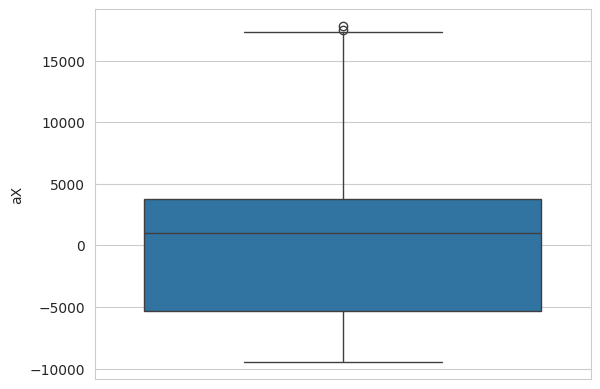

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(sns.boxplot(data['aX']))
# print(f"이상치 보다 높은 갯수 : {train_seoul.loc[train_seoul.log_price < 11.5].shape[0]}")
# print(f"이상치 보다 낮은 갯수 : {train_seoul.loc[train_seoul.log_price < 9].shape[0]}")

In [84]:
data

,aX,aY,aZ,gX,gY,gZ,mX
0,-2544,14340,-6864,3840,-335,-1518,-1760
1,-2380,14188,-5644,3888,1635,-9604,-2419
2,-524,14480,-7148,3888,-1663,-1491,311
3,-528,15052,-6672,3904,461,-4012,-1424
4,-2808,14040,-5936,3904,595,-339,13
...,...,...,...,...,...,...,...
27990,-5208,1152,-15040,6016,23,382,-63
27991,-5104,1048,-15160,6016,81,346,-88
27992,-5144,1108,-15100,6016,4,362,-32
27993,-5052,1892,-14688,6064,413,778,594


In [85]:
data.isna

<bound method DataFrame.isna of          aX     aY     aZ    gX    gY    gZ    mX
0     -2544  14340  -6864  3840  -335 -1518 -1760
1     -2380  14188  -5644  3888  1635 -9604 -2419
2      -524  14480  -7148  3888 -1663 -1491   311
3      -528  15052  -6672  3904   461 -4012 -1424
4     -2808  14040  -5936  3904   595  -339    13
...     ...    ...    ...   ...   ...   ...   ...
27990 -5208   1152 -15040  6016    23   382   -63
27991 -5104   1048 -15160  6016    81   346   -88
27992 -5144   1108 -15100  6016     4   362   -32
27993 -5052   1892 -14688  6064   413   778   594
27994 -5072   1060 -15048  6080   -40   470   -69

[27995 rows x 7 columns]>

# 각가에 데이터 전처리

In [86]:
data.shape

(27995, 7)

In [87]:
shacking_off= data[mask_1]
shacking_on = data[mask_2]

# modeling

In [12]:
X_tarin, X_valid = train_test_split(data, test_size=0.2, random_state=42)
# data = data.drop(['mY', 'mZ', "Result"], axis=1)
X_train_label = X_tarin['Result']
X_valid_label = X_valid['Result']

KeyError: 'Result'

In [13]:
X_tarin = X_tarin.drop(['mY', 'mZ', "Result"], axis=1)
X_valid = X_valid.drop(['mY', 'mZ', "Result"], axis=1)

KeyError: "['mY', 'mZ', 'Result'] not found in axis"

In [14]:
shacking_off_ax = shacking_off['aX']
shacking_on_ax = shacking_on['aX']
print()
plt.scatter(range(len(shacking_off_ax)), shacking_off_ax, color='red')
plt.scatter(range(len(shacking_on_ax)), shacking_on_ax, color='green')


NameError: name 'shacking_off' is not defined

# Modeling

In [15]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st_data = st.fit(data).transform(data)

In [16]:
st_data

array([[-0.49766964,  1.65019917,  2.11661046, ..., -0.09536581,
        -0.53687135, -1.68112088],
       [-0.46625612,  1.62097726,  2.51543678, ...,  1.87478318,
        -2.95742363, -2.2935056 ],
       [-0.11074702,  1.67711409,  2.02376893, ..., -1.42346625,
        -0.52878887,  0.24338405],
       ...,
       [-0.99568886, -0.89364499, -0.57579408, ...,  0.24365983,
         0.02590855, -0.07535337],
       [-0.97806664, -0.74292145, -0.44110848, ...,  0.65269076,
         0.15043857,  0.50636565],
       [-0.98189756, -0.90287296, -0.55879493, ...,  0.1996565 ,
         0.05823846, -0.10973612]])

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
print(data.shape)
print(label.shape)

(27995, 7)
(27995,)


In [20]:
np_label =np.array(label)

class CustomDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label
        
    def __len__(self):
        return len(self.data)
    
    
    def __getitem__(self, item):
        return self.data[item], self.label[item]

In [21]:
dataset = CustomDataset(st_data, np_label)

In [22]:
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [23]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=7, out_features=256, dtype=torch.float64)
        self.fc2 = nn.Linear(in_features=256, out_features=256, dtype=torch.float64)
        self.fc3 = nn.Linear(in_features=256, out_features=64, dtype=torch.float64)
        self.fc4 = nn.Linear(in_features=64, out_features=32, dtype=torch.float64)
        self.fc5 = nn.Linear(in_features=32, out_features=1, dtype=torch.float64)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x
        

In [24]:
model = CustomModel()

In [25]:
small, label = next(iter(data_loader))

In [31]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7)
criterion = nn.BCELoss()

In [32]:
model.to(device)
criterion.to(device)

BCELoss()

In [33]:
from tqdm import tqdm

model.train()
losses = 0
loss_list= []
for epoch in range(5):
    for d, v in tqdm(data_loader):
        
        data = d.to(device)
        v = v.to(device)
        optimizer.zero_grad()
        
        output_data = model(data) 
        result = F.sigmoid(output_data)
        loss = criterion(result.reshape(-1, 1).to(torch.float32), v.reshape(-1, 1).to(torch.float32))
        loss_list.append(loss.item())
        loss.backward()
        optimizer.step()
        losses += loss.item()    
    
print(losses/len(data_loader))

100%|██████████| 438/438 [00:00<00:00, 480.25it/s]

0.09954229548648447


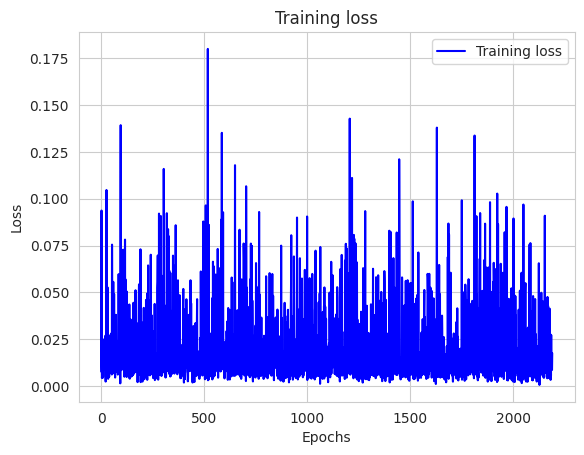

In [34]:
epochs = range(1, len(loss_list) + 1)

# Plot the loss values
plt.plot(epochs, loss_list, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
epoch_loss = 0
epoch_acc = 0
model.eval()
loss_history = []

with torch.no_grad():
    for i, (d, v) in enumerate(data_loader):
        data = d.to(device)
        v = v.to(device)
        output_data = model(data)
        result = F.sigmoid(output_data)
        rounded_preds = torch.round(result)
        correct = (rounded_preds.flatten() == v)
        accuracy = correct.sum() / len(correct)
        print(f"{i}정확도 : {accuracy*100}%")
        loss = criterion(result.reshape(-1, 1).to(torch.float32), v.reshape(-1, 1).to(torch.float32))
        loss_history.append(loss.item())
        epoch_loss += loss.item()

0정확도 : 100.0%
1정확도 : 100.0%
2정확도 : 98.4375%
3정확도 : 100.0%
4정확도 : 100.0%
5정확도 : 100.0%
6정확도 : 100.0%
7정확도 : 98.4375%
8정확도 : 100.0%
9정확도 : 96.875%
10정확도 : 98.4375%
11정확도 : 100.0%
12정확도 : 100.0%
13정확도 : 98.4375%
14정확도 : 100.0%
15정확도 : 100.0%
16정확도 : 98.4375%
17정확도 : 98.4375%
18정확도 : 100.0%
19정확도 : 100.0%
20정확도 : 100.0%
21정확도 : 100.0%
22정확도 : 98.4375%
23정확도 : 100.0%
24정확도 : 98.4375%
25정확도 : 100.0%
26정확도 : 100.0%
27정확도 : 100.0%
28정확도 : 100.0%
29정확도 : 100.0%
30정확도 : 98.4375%
31정확도 : 100.0%
32정확도 : 100.0%
33정확도 : 100.0%
34정확도 : 100.0%
35정확도 : 100.0%
36정확도 : 98.4375%
37정확도 : 100.0%
38정확도 : 98.4375%
39정확도 : 98.4375%
40정확도 : 100.0%
41정확도 : 96.875%
42정확도 : 100.0%
43정확도 : 100.0%
44정확도 : 100.0%
45정확도 : 100.0%
46정확도 : 98.4375%
47정확도 : 100.0%
48정확도 : 100.0%
49정확도 : 100.0%
50정확도 : 100.0%
51정확도 : 100.0%
52정확도 : 100.0%
53정확도 : 100.0%
54정확도 : 100.0%
55정확도 : 100.0%
56정확도 : 98.4375%
57정확도 : 100.0%
58정확도 : 100.0%
59정확도 : 98.4375%
60정확도 : 100.0%
61정확도 : 100.0%
62정확도 : 100.0%
63정확도 : 96.875%
64정확도 : 100.0%
65

In [341]:
loss_history

[0.012691943906247616,
 0.016388848423957825,
 0.011871914379298687,
 0.05402331426739693,
 0.006215719971805811,
 0.010243234224617481,
 0.01072913408279419,
 0.04200511425733566,
 0.16617117822170258,
 0.04305777698755264,
 0.007337520364671946,
 0.0049842181615531445,
 0.06010410562157631,
 0.01944817043840885,
 0.02198953740298748,
 0.001582388300448656,
 0.0038102134130895138,
 0.00791183952242136,
 0.004082198720425367,
 0.0013791965320706367,
 0.02191455475986004,
 0.011784596368670464,
 0.026231976225972176,
 0.009595442563295364,
 0.011107651516795158,
 0.006557060871273279,
 0.0516170859336853,
 0.05915055796504021,
 0.015591567382216454,
 0.11503634601831436,
 0.1181953102350235,
 0.01577943190932274,
 0.022530118003487587,
 0.0019501468632370234,
 0.049544014036655426,
 0.023008005693554878,
 0.03289687633514404,
 0.0037429453805088997,
 0.0010916553437709808,
 0.0029890260193496943,
 0.00900940876454115,
 0.029411206021904945,
 0.005105392076075077,
 0.01465789508074522,
 